**Importing necessary Libraries**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')
import joblib

**Data Collection**

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**EDA**

In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Handling missing values**

In [7]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


no missing instance

**Handling duplicate data**

In [8]:
df.duplicated().sum()

np.int64(240)

In [9]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1359, 12)

**Removing Outliers**

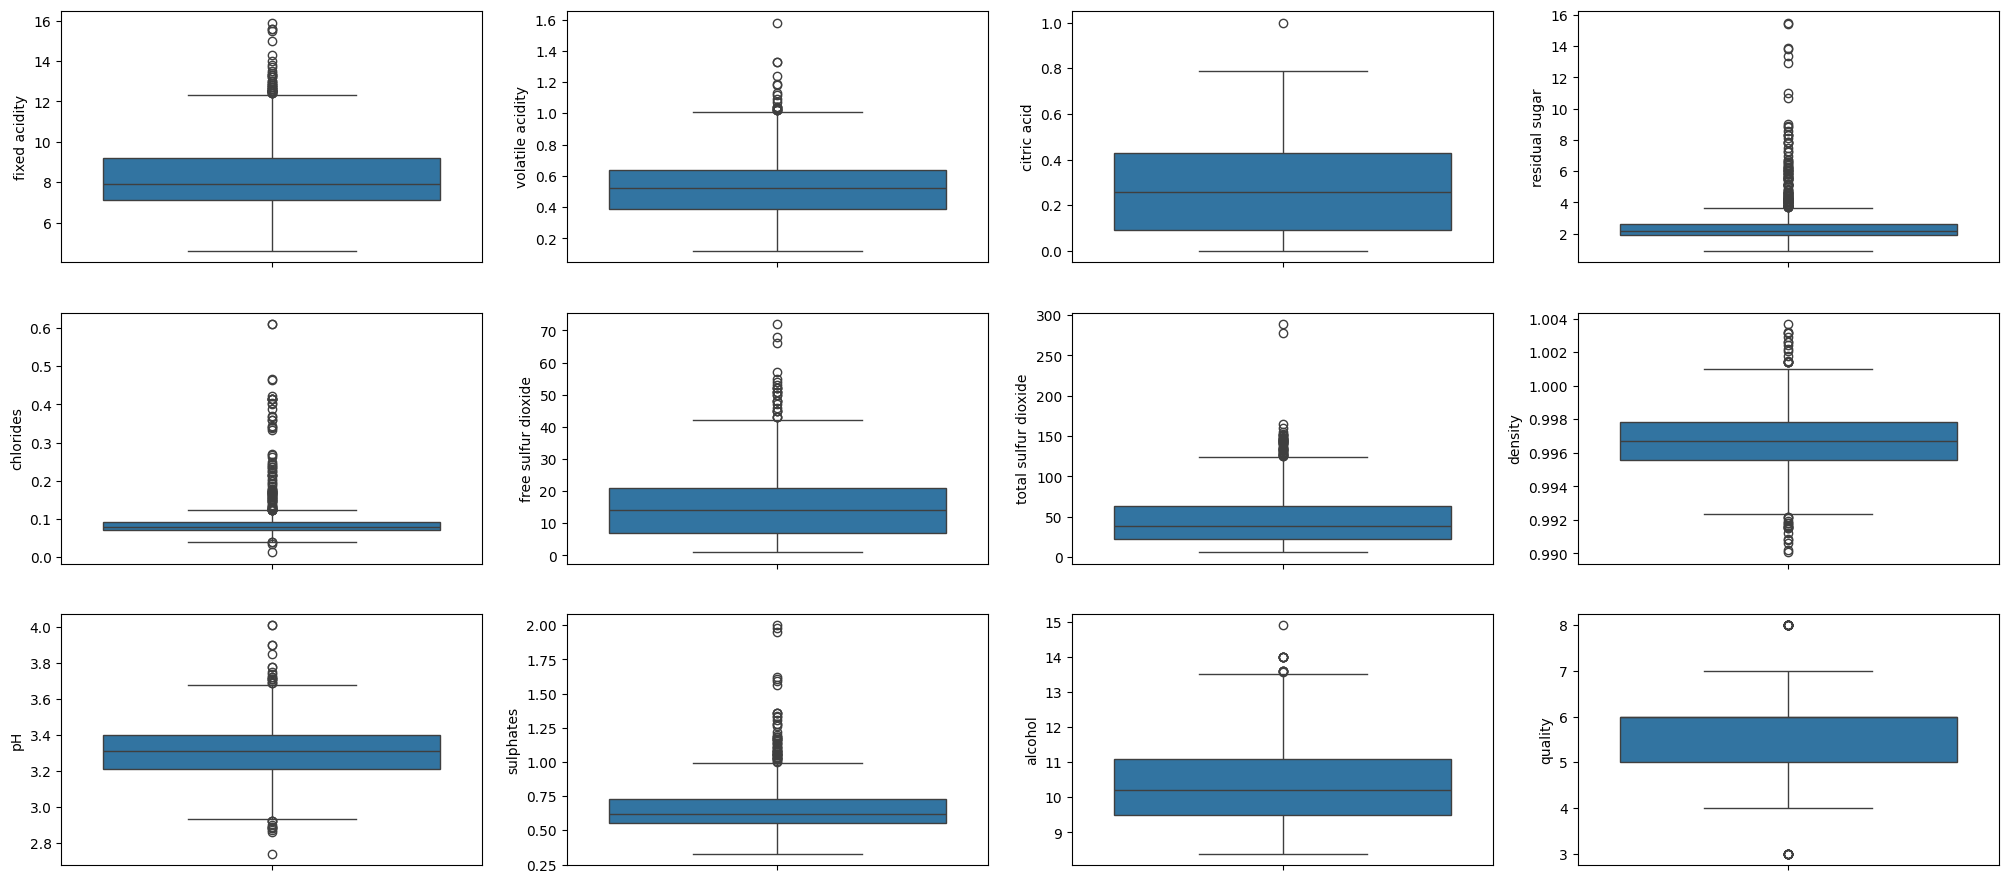

In [12]:
i=1
plt.figure(figsize=(25,15))
for column in df.columns:
  plt.subplot(4,4,i)
  i = i+1
  sns.boxplot(df[column])

plt.show()

In [13]:
for col in df.columns[:-1]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1

  lower_limit = Q1-1.5*IQR
  upper_limit = Q3+1.5*IQR

  df = df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,8.138579,0.522695,0.247949,2.188934,0.078129,14.719797,41.176650,0.996507,3.324579,0.628853,10.395381,5.643655
std,1.460696,0.168185,0.182103,0.448518,0.014966,8.574557,25.201208,0.001583,0.131157,0.111660,0.990583,0.772970
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992400,2.980000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.068000,8.000000,22.000000,0.995500,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996500,3.320000,0.610000,10.100000,6.000000
75%,9.000000,0.635000,0.400000,2.500000,0.087000,20.000000,55.000000,0.997480,3.410000,0.700000,11.100000,6.000000
max,12.300000,1.010000,0.730000,3.650000,0.121000,40.000000,114.000000,1.000400,3.680000,0.940000,13.400000,8.000000


**Feature selection**

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.288516,0.653996,0.228080,0.184628,-0.150600,-0.103047,0.594811,-0.699294,0.164897,-0.020864,0.129739
volatile acidity,-0.288516,1.000000,-0.625634,0.013343,0.124037,-0.008736,0.108616,0.044555,0.250983,-0.320766,-0.231145,-0.357357
citric acid,0.653996,-0.625634,1.000000,0.150388,0.051142,-0.081912,-0.007448,0.274774,-0.480568,0.278684,0.164969,0.243164
residual sugar,0.228080,0.013343,0.150388,1.000000,0.246455,0.078124,0.158926,0.381812,-0.068465,0.046317,0.103327,0.035076
chlorides,0.184628,0.124037,0.051142,0.246455,1.000000,0.031840,0.178405,0.413761,-0.174504,-0.102031,-0.305552,-0.184901
free sulfur dioxide,-0.150600,-0.008736,-0.081912,0.078124,0.031840,1.000000,0.626561,-0.010024,0.127138,0.104110,-0.037504,-0.012014
total sulfur dioxide,-0.103047,0.108616,-0.007448,0.158926,0.178405,0.626561,1.000000,0.146110,0.017320,-0.046874,-0.250690,-0.180038
density,0.594811,0.044555,0.274774,0.381812,0.413761,-0.010024,0.146110,1.000000,-0.238390,0.047893,-0.554258,-0.221486
pH,-0.699294,0.250983,-0.480568,-0.068465,-0.174504,0.127138,0.017320,-0.238390,1.000000,0.003509,0.105050,-0.078619
sulphates,0.164897,-0.320766,0.278684,0.046317,-0.102031,0.104110,-0.046874,0.047893,0.003509,1.000000,0.293107,0.447756


<Axes: >

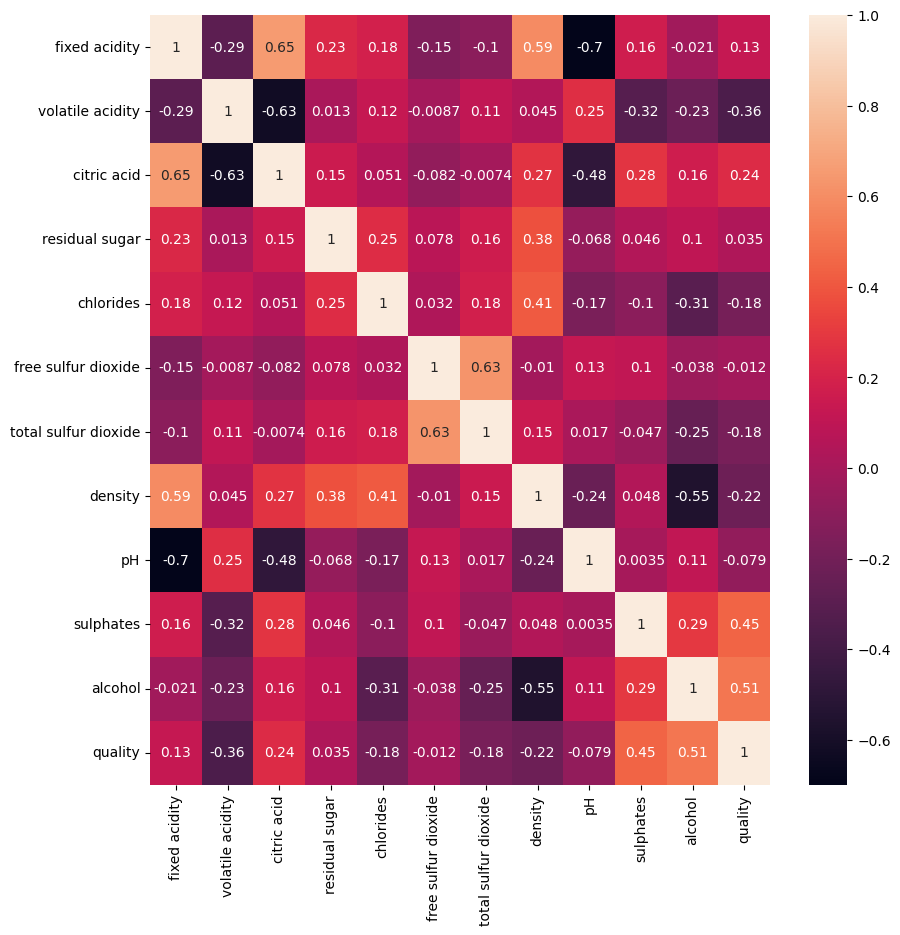

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

since fixed acidity and pH is having high negative pearson correlation of -0.7 we will remove one of them, now fixed acidity have correlation of 0.12 with target variable while pH have correlation of -0.081 so we will drop pH column. similarly, we have high positive pearson correlation of 0.65 between citric acid and fixed acidity, each having correlation with target variable of 0.21 and 0.12 respectively. So, we keep citric acid and drop fixed acidity. similarly, we have high negative pearson correlation of -0.63 between citric acid and volatile acidity, each having correlation with target variable of 0.21 and -0.26 respectively. So, we keep volatile acidity and drop citric acid. similarly, we have high positive pearson correlation of 0.63 between total sulfur dioxide and free sulfur dioxide, each having correlation with target variable of -0.16 and -0.07 respectively. So, we keep total sulfur dioxide and free sulfur dioxide.

Now dropping: pH, fixed acidity, citric acid, free sulfur dioxide

In [17]:
df.drop(['pH', 'fixed acidity', 'citric acid', 'free sulfur dioxide'], axis = 1, inplace = True)

In [18]:
df.head()

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,1.9,0.076,34.0,0.9978,0.56,9.4,5
1,0.88,2.6,0.098,67.0,0.9968,0.68,9.8,5
2,0.76,2.3,0.092,54.0,0.9970,0.65,9.8,5
3,0.28,1.9,0.075,60.0,0.9980,0.58,9.8,6
5,0.66,1.8,0.075,40.0,0.9978,0.56,9.4,5


**Feature scaling**

In [19]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [20]:
df['quality'].value_counts()

,count
quality,
0,860
1,125


In [21]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [52]:
X_scaled = MinMaxScaler().fit_transform(X)

**oversampling to balance the dataset using SMOTE**

In [53]:
smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X_scaled, y)

In [54]:
y_res.value_counts()

,count
quality,
0,860
1,860


**Train Test Split**

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

**Checking accuracy of some ml models**

In [76]:
names = ['SVC',
          'DecisionTreeClassifier()',
          'RandomForestClassifier()',
          'XGBClassifier()',
          'KNeighborsClassifier()']

models =      [SVC(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               XGBClassifier(),
               KNeighborsClassifier()]

In [102]:
for name, model in zip(names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name}: Accuracy = {acc:.2f}%")

SVC: Accuracy = 88.66%
DecisionTreeClassifier(): Accuracy = 86.63%
RandomForestClassifier(): Accuracy = 93.02%
XGBClassifier(): Accuracy = 93.90%
KNeighborsClassifier(): Accuracy = 90.70%


Checking which model is best out of top 3 models

In [104]:
for name, model in zip(names, models):
    scores = cross_val_score(model, X_res, y_res, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean() * 100:.2f}%")

SVC: Mean Accuracy = 85.41%
DecisionTreeClassifier(): Mean Accuracy = 86.51%
RandomForestClassifier(): Mean Accuracy = 90.93%
XGBClassifier(): Mean Accuracy = 91.28%
KNeighborsClassifier(): Mean Accuracy = 86.74%


XGBclassifer is the best models

Let's perform hyperparameter tuning in XGBclassifer

In [105]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [109]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=2)

In [110]:
print("Best Parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Accuracy: 94.19%
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       175
           1       0.92      0.96      0.94       169

    accuracy                           0.94       344
   macro avg       0.94      0.94      0.94       344
weighted avg       0.94      0.94      0.94       344



In [113]:
joblib.dump(best_xgb, 'xgb_model.pkl')
print("Model downloaded successfully")

Model downloaded successfully
